# მოდელის ამოცანის დასმა
<span style="font-size: 16px;">დიეტა უამრავი ადამიანებისთვის ცხოვრების მნიშვნელოვანი ნაწილია; იქნება ეს ჯანმრთელობის გაუმჯობესების, შეხედულების შენარჩუნებისა თუ სხვა მიზეზების გამო. ზოგიერთ შემთხვევაში კი დიეტის მთავარ მიზანს საკვების გარკვეული ნივთიერების კონსისტენტურად მიღება წარმოადგენს. მოცემული მონაცემებიდან ჩვენ გვინდა, რომ ავაგოთ მოდელი, რომელიც მომხმარებელს შესთავაზებს, თუ რა საკვების მიღება არის მისთვის პრიორიტეტი, რათა სწორად მიჰყვეს მის დიეტას და მისთვის სასურველ შედეგს მიაღწიოს.</span>

<span style="font-size: 16px;">მიზნის მისაღწევად თავდაპირველად დავამუშავებთ მონაცემებს და გამოვიყენებთ ისეთ დიეტებს, რომელთაც მომხმარებლები დიდი სიზუსტით და დარღვევის გარეშე მიჰყვებოდნენ, მიღებული დიეტების შემადგენელ საკვებს კი შემდეგ მომხმარებლისთვის რეკომენდაციისთვის გამოვიყენებთ. მომხმარებელი გადმოგვცემს მონაცემებს, თუ რა არის მისთვის სასურველი/მისაღწევი საკვების ნივთიერებების შემადგენლობა, და თუ დღემდე როგორ მიჰყვებოდა თავის დიეტას, რისი დამუშავებითაც ჩვენი მოდელი ნახავს, თუ სავარაუდოდ რა შემცველობის საკვებს მიიღებს იგი შემდეგ დღეს, და გადაწყვეტს ნავარაუდევი საკვები კარგი არის თუ არა მომხმარებლისთვის და მისი დიეტისთვის, რის შემდეგაც მომხმარებელს მიღებულ შედეგს შეატყობინებს.</span>

# მონაცემების გაანალიზება

<span style="font-size: 16px;">**ამოცანის გადაჭრის პირველ ეტაპზე გავარჩიოთ გადმოცემული მონაცემები**</span>

<span style="font-size: 16px;">თავდაპირველად დავაიმპორტოთ საჭირო ბიბლიოთეკები.</span>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
# We will need json as the given data and users' diet days are represented as JSON objects 
import json

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

<span style="font-size: 16px;">შევინახოთ მონაცემები `train` ცვლადში.</span>

In [2]:
# Store data
train = pd.read_csv('mfp-diaries.tsv', sep='\t')

<span style="font-size: 16px;">ვნახოთ, თუ როგორ გამოიყურება და რა სახის ფორმატში გვაქვს გადმოცემული მონაცემები</span>

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587186 entries, 0 to 587185
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

<span style="font-size: 16px;">მონაცემებზე კარგად დაკვირვებით ვხედავთ, რომ ჩვენი მონაცემები შედგება **მომხმარებლის იდენტიფიკატორით**, **თარიღით**, მიმდინარე დღეს **მიღებული საკვების ნივთიერებების რაოდენობითა** და მისი მიმდინარე დღის **სასურველი ნივთიერებების მიღების რაოდენობით (მიზანი)**. მონაცემების უკეთ დასანახად/გასანაწილებლად ვნახოთ პირველი მომხმარებლის პირველი დღის ჩანაწერი:</span>

In [4]:
def get_details_for_index(data, row_index):
    """This function returns details of user data for given row index (user_id, date, food entries, goal)"""
    # Id of the first user
    user_id = data.iloc[row_index, 0]
    # Date of the first user's first day of the diet
    date = data.iloc[row_index, 1]
    # User's intake of neutrients for the day
    food_entries = json.loads(data.iloc[row_index, 2])
    #ser's goal intake of neutrients for the day
    intake_goal = json.loads(data.iloc[row_index, 3])
    
    return (user_id, date, food_entries, intake_goal)

In [5]:
for i in range(1, 2):
    details = get_details_for_index(train, i)

    print('\n------------- User ' + str(details[0]) + ' Date ' + str(details[1]) + ' -------------\n')
    print('------------- Food Entries -------------')
    print(json.dumps(details[2], indent=2))
    print('\n------------- Sum -------------')
    print(json.dumps(details[3], indent=2))


------------- User 1 Date 2014-09-16 -------------

------------- Food Entries -------------
[
  {
    "meal": "MY food",
    "dishes": [
      {
        "nutritions": [
          {
            "name": "Calories",
            "value": "147"
          },
          {
            "name": "Carbs",
            "value": "36"
          },
          {
            "name": "Fat",
            "value": "0"
          },
          {
            "name": "Protein",
            "value": "0"
          },
          {
            "name": "Sodium",
            "value": "306"
          },
          {
            "name": "Sugar",
            "value": "36"
          }
        ],
        "name": "Gatorade - Lemon-Lime (Australia), 600 ml"
      },
      {
        "nutritions": [
          {
            "name": "Calories",
            "value": "412"
          },
          {
            "name": "Carbs",
            "value": "29"
          },
          {
            "name": "Fat",
            "value": "24"
     

<span style="font-size: 16px;">მონაცემების ვიზუალურად წარმოსაჩენად დამხმარე ფუნქციები:</span>

In [6]:
def plot_items(items, x_label, y_label, title, colors = None, width = 7):
    """Plots given items' values"""
    rcParams['figure.figsize'] = width, 5
    # Prepare labels and values for the graph
    indexes = []
    counts = []
    index_labels = []
    i = 1
    for item_name, item_count in items.items():
        print('> ' + str(item_name) + ': ' + str(item_count))
        indexes.append(i)
        counts.append(item_count)
        index_labels.append(item_name)
        i += 1

    # Plot the graph
    if colors is not None:
        plt.bar(indexes, counts, tick_label = index_labels, width = 0.8, color = colors)
    else:
        plt.bar(indexes, counts, tick_label = index_labels, width = 0.8)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title) 
    
    plt.show()
    
def plot_pie_with_legend(items):
    """Plots given items' value percentages with legend"""
    labels = []
    sizes = []
    for x, y in items.items():
        labels.append(x)
        sizes.append(y)

    fig, ax = plt.subplots(figsize=(6, 5))
    fig.subplots_adjust(0.3,0,1,1)
    
    theme = plt.get_cmap('viridis')
    ax.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

    _, _ = ax.pie(sizes, startangle=90, radius=1800)

    ax.axis('equal')
    plt.legend(
        loc = 'upper left',
        labels = ['%s - %1.1f%%' % (l, (float(s) / sum(sizes)) * 100) for l, s in zip(labels, sizes)],
        prop = {'size': 15},
        bbox_to_anchor = (-0.3, 1),
        bbox_transform = fig.transFigure
    )

    plt.show()

<span style="font-size: 16px;">მონაცემების გასაანალიზებლად და იმის დასადგენად, თუ რომელი დიეტები შეგვიძლია ჩავთვალოთ **კარგად** (იგულისხმება თუ რამდენად სწორად მიყვებოდა და რამხელა სიდიდით დაარღვია პიროვნებამ მისი დიეტა) ვნახოთ, თუ **საშუალოდ რამდენად ცდება** თითოეული პიროვნება მის განსაზღვრულ/სასურველ ნივთიერებათა რაოდენობას. დავითვალოთ თუ რა რაოდენობის ნივთიერება მიიღო მომხმარებელმა მისი მთლიანი დიეტის პერიოდში და რამდენის მიღება ჰქონდა გასაზღვრული, შემდეგ კი დავთვალოთ საშუალო აცდენა</span>

In [7]:
curr_user_id = train.iloc[0, 0]
users_intakes = {}
users_goals = {}
for i in range(len(train.index)):
    # Get the details of the day for the current row
    curr_day_user_id = train.iloc[i, 0]
    # Add user to dict if not present
    if curr_day_user_id not in users_intakes:
        users_intakes[curr_day_user_id] = {}
        users_goals[curr_day_user_id] = {}
        
    curr_sum = json.loads(train.iloc[i, 3])
    
    curr_intakes = curr_sum['total']
    for n in range(len(curr_intakes)):
        _name = curr_intakes[n]['name']
        _value = curr_intakes[n]['value']
        if _name not in users_intakes[curr_day_user_id]:
            users_intakes[curr_day_user_id][_name] = _value
        else:
            users_intakes[curr_day_user_id][_name] += _value
        
    curr_goals = curr_sum['goal']
    for n in range(len(curr_goals)):
        _name = curr_goals[n]['name']
        _value = curr_goals[n]['value']
        if _name not in users_goals[curr_day_user_id]:
            users_goals[curr_day_user_id][_name] = _value
        else:
            users_goals[curr_day_user_id][_name] += _value

#Now we count absolute differences between each users intake and their goals
users_diffs = {}
for i in users_intakes:
    users_diffs[i] = {}
    for _name in users_intakes[i]:
        if _name in users_goals[i]:
            users_diffs[i][_name] = abs(users_intakes[i][_name] - users_goals[i][_name])

<span style="font-size: 16px;">მიღებული მონაცემების მაგალითი თითოეულ მომხმარებელზე:</span>

In [8]:
USERS_TO_SHOW = 3
users_shown = 0
for i in users_intakes:
    if users_shown == USERS_TO_SHOW:
        break
    users_shown += 1
    print('მომხმარებელი {0}:'.format(str(i)))
    for _name in users_intakes[i]:
        print('    {0}: მიიღო {1}, განსაზღვრული {2}, სხვაობა {3};'.format(_name, str(users_intakes[i][_name]), 
                                                     str(users_goals[i][_name]), str(users_diffs[i][_name])))
    print("")

მომხმარებელი 1:
    Calories: მიიღო 398826, განსაზღვრული 371912, სხვაობა 26914;
    Carbs: მიიღო 31925, განსაზღვრული 46237, სხვაობა 14312;
    Fat: მიიღო 13448, განსაზღვრული 12367, სხვაობა 1081;
    Protein: მიიღო 22222, განსაზღვრული 18869, სხვაობა 3353;
    Sodium: მიიღო 356829, განსაზღვრული 397900, სხვაობა 41071;
    Sugar: მიიღო 14118, განსაზღვრული 13957, სხვაობა 161;

მომხმარებელი 2:
    Calories: მიიღო 87430, განსაზღვრული 90925, სხვაობა 3495;
    Carbs: მიიღო 10872, განსაზღვრული 11387, სხვაობა 515;
    Fat: მიიღო 2537, განსაზღვრული 2955, სხვაობა 418;
    Protein: მიიღო 2550, განსაზღვრული 4714, სხვაობა 2164;
    Sodium: მიიღო 100217, განსაზღვრული 138000, სხვაობა 37783;
    Sugar: მიიღო 4573, განსაზღვრული 3422, სხვაობა 1151;

მომხმარებელი 3:
    Calories: მიიღო 11969, განსაზღვრული 9438, სხვაობა 2531;
    Carbs: მიიღო 811, განსაზღვრული 1178, სხვაობა 367;
    Fat: მიიღო 267, განსაზღვრული 312, სხვაობა 45;
    Protein: მიიღო 323, განსაზღვრული 469, სხვაობა 146;
    Sodium: მიიღო 10156, გ

<span style="font-size: 16px;">ვნახოთ, თუ რამდენ განსხვავებულ საკვების ნივთიერებაზე არის მონაცემები ჩაწერილი (თითოეულ ნივთიერებაზე რამდენ მომხმარებელს აქვს ჩანაწერი:</span>

In [9]:
name_counts = {}

for i in users_diffs:
    for _name in users_diffs[i]:
        if _name not in name_counts:
            name_counts[_name] = 0
        else:
            name_counts[_name] += 1

for _name in name_counts:
    print("{0} ნივთიერებაზე ჩანაწერი აქვს {1} მომხმარებელს".format(_name, name_counts[_name]))

Calories ნივთიერებაზე ჩანაწერი აქვს 9894 მომხმარებელს
Carbs ნივთიერებაზე ჩანაწერი აქვს 9683 მომხმარებელს
Fat ნივთიერებაზე ჩანაწერი აქვს 9568 მომხმარებელს
Protein ნივთიერებაზე ჩანაწერი აქვს 9759 მომხმარებელს
Sodium ნივთიერებაზე ჩანაწერი აქვს 6675 მომხმარებელს
Sugar ნივთიერებაზე ჩანაწერი აქვს 6542 მომხმარებელს
Fiber ნივთიერებაზე ჩანაწერი აქვს 3628 მომხმარებელს
Potass. ნივთიერებაზე ჩანაწერი აქვს 286 მომხმარებელს
Iron ნივთიერებაზე ჩანაწერი აქვს 473 მომხმარებელს
Calcium ნივთიერებაზე ჩანაწერი აქვს 371 მომხმარებელს
Sat Fat ნივთიერებაზე ჩანაწერი აქვს 295 მომხმარებელს
Chol ნივთიერებაზე ჩანაწერი აქვს 309 მომხმარებელს
Vit A ნივთიერებაზე ჩანაწერი აქვს 19 მომხმარებელს
Vit C ნივთიერებაზე ჩანაწერი აქვს 48 მომხმარებელს
Trn Fat ნივთიერებაზე ჩანაწერი აქვს 47 მომხმარებელს
Mon Fat ნივთიერებაზე ჩანაწერი აქვს 7 მომხმარებელს
Ply Fat ნივთიერებაზე ჩანაწერი აქვს 11 მომხმარებელს


<span style="font-size: 16px;">აქედან ჩანს, რომ **Potass., Iron, Calcium, Sat Fat, Chol, Vit A, Vit C, Trn Fat, Mon Fat და Ply Fat** ნივთიერებებზე ჩანაწერები საკმაოდ ცოტა მომხმარებელს აქვს. ვინაიდან მოდელის მოსამზადებლად ამ მონაცემებს დიდი გავლენა არ ექნებათ, ვინაიდან მათზე საკმარისი ზუსტი ჩანაწერები არ არის, შეგვიძლია ამ ნივთიერებების ჩანაწერების მქონე მომხმარებლები ჩვენი `train` მონაცემებიდან ამოვიღოთ და შევინახოთ `train_accepted` ცვლადში</span>

In [10]:
UNACCEPTED_NUTRIENTS = ['Potass.', 'Iron', 'Calcium', 'Sat Fat', 'Chol', 'Vit A', 'Vit C', 'Trn Fat', 'Mon Fat', 'Ply Fat']
unaccepted_nutrient_users = set()

for i in users_diffs:
    for _name in users_diffs[i]:
        if _name in UNACCEPTED_NUTRIENTS:
            # This user has data for the unaccepted nutrient, so we add it to the unaccepted_nutrients list
            unaccepted_nutrient_users.add(i)
            break
            
# We remove unaccepted users from diffs dictionary
for i in unaccepted_nutrient_users:
    del users_diffs[i]

print("არავალიდური ნივთიერებიბის ჩანაწერები ჯამში {0} განსხვავებულ მომხმარებელს აქვს.".format(str(len(unaccepted_nutrient_users))))

არავალიდური ნივთიერებიბის ჩანაწერები ჯამში 1596 განსხვავებულ მომხმარებელს აქვს.


In [11]:
def make_dataframe_copy(data, ids_to_remove):
    """This function makes copy of the given data with given users removed"""
    # First we make the copy of the original data
    copy_train = data.copy()

    # And now we drop the rows for the given users
    i = 0
    rows_to_drop = []
    while i < len(copy_train.index):
        curr_user_id = copy_train.iloc[i, 0]
        if curr_user_id in ids_to_remove:
            rows_to_drop.append(i)
        i += 1

    copy_train = copy_train.drop(rows_to_drop)
    return copy_train

In [12]:
train_accepted = make_dataframe_copy(train, unaccepted_nutrient_users)

<span style="font-size: 16px;">მიღებული მონაცემები `train_accepted` ცვლადში შევინახოთ ცალკე *train_accepted.tsv* ფაილად. (გამოვიყენებთ სატესტო მიზნებისთვის):</span>

In [13]:
train_accepted.to_csv("train_accepted.tsv", sep="\t")

<span style="font-size: 16px;">საშუალო, მაქსიმალური და მინიმალური სხვაობები:</span>

Calories ნივთიერების მონაცემები:
> მინიმუმი: 6
> მაქსიმუმი: 755340
> საშუალო: 26107


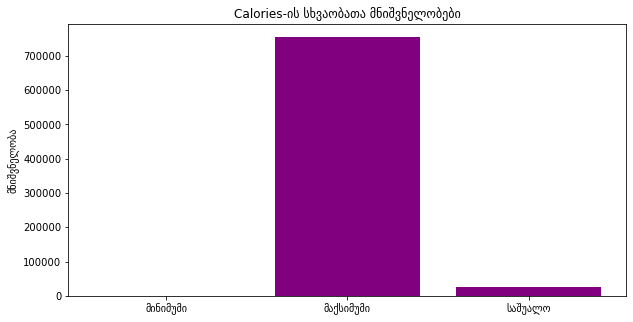

Carbs ნივთიერების მონაცემები:
> მინიმუმი: 0
> მაქსიმუმი: 424628
> საშუალო: 3544


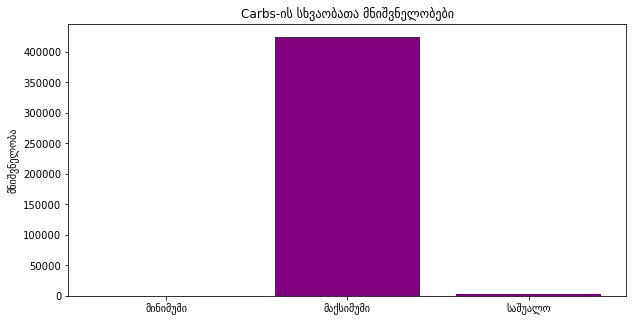

Fat ნივთიერების მონაცემები:
> მინიმუმი: 0
> მაქსიმუმი: 104386
> საშუალო: 911


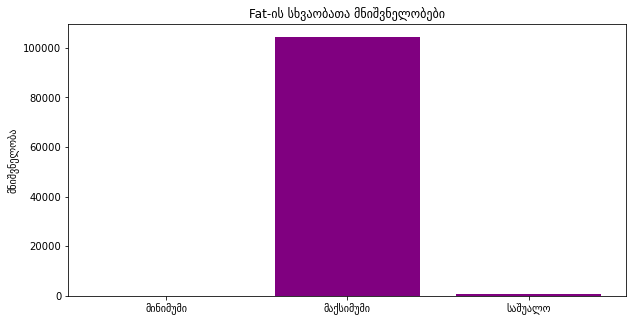

Protein ნივთიერების მონაცემები:
> მინიმუმი: 0
> მაქსიმუმი: 283941
> საშუალო: 2578


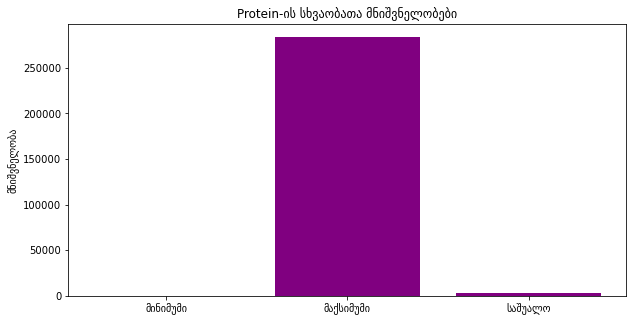

Sodium ნივთიერების მონაცემები:
> მინიმუმი: 6
> მაქსიმუმი: 1815261
> საშუალო: 29388


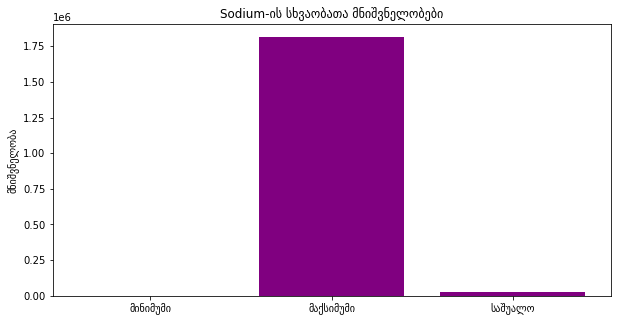

Sugar ნივთიერების მონაცემები:
> მინიმუმი: 0
> მაქსიმუმი: 164390
> საშუალო: 991


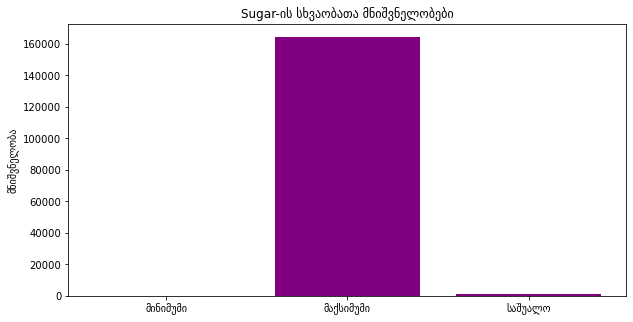

Fiber ნივთიერების მონაცემები:
> მინიმუმი: 0
> მაქსიმუმი: 8298
> საშუალო: 318


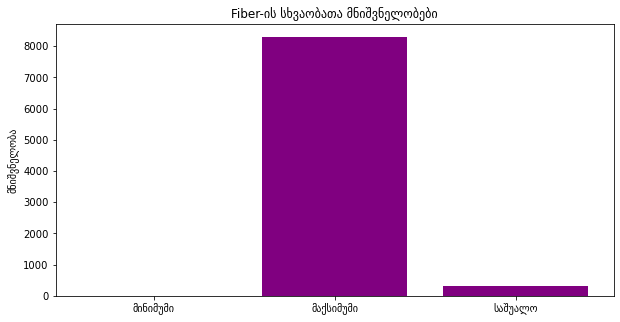

In [14]:
diff_averages = {}
diff_mins = {}
diff_maxs = {}

for i in users_diffs:
    for _name in users_diffs[i]:
        curr_diff = users_diffs[i][_name]
        if _name not in diff_averages:
            diff_averages[_name] = 0
            diff_mins[_name] = float("inf")
            diff_maxs[_name] = float("-inf")
        diff_averages[_name] += curr_diff
        diff_mins[_name] = min(curr_diff, diff_mins[_name])
        diff_maxs[_name] = max(curr_diff, diff_maxs[_name])

for _name in diff_averages:
    diff_averages[_name] = int(diff_averages[_name] / len(users_diffs))

for _name in diff_averages:
    print("{0} ნივთიერების მონაცემები:".format(_name))
    diffs_to_plot = {"მინიმუმი": diff_mins[_name], "მაქსიმუმი": diff_maxs[_name], "საშუალო": diff_averages[_name]}
    plot_items(diffs_to_plot, "", "მნიშვნელობა", _name + "-ის სხვაობათა მნიშვნელობები", colors = 'Purple', width = 10)

<span style="font-size: 16px;">ეს მონაცემები მოდელის მომზადებაში დაგვეხმარება. **ისეთი დიეტები, რომელთა დროსაც მომხმარებელმა რომელიმე საკვების ნივთიერება საშუალო სხვაობაზე მეტი მნიშვნელობით დაარღვია, შეგვიძლია ჩავთვალოთ, რომ ცუდად შესრულებული დიეტაა და გავითვალისწინოთ მისი წაშლა მონაცემებიდან, რაც მოდელისთვის უკეთესი შედეგის მომცემი უნდა იყოს.**</span>

<span style="font-size: 16px;">ახლა ვნახოთ, თუ როგორ არის დამოკიდებული ნივთიერებათა სხვაობების მნიშვნელობები მომხმარებელთა რაოდენობებზე. ვინაიდან საშუალო სხვაობებს შორის ყველაზე მეტი მნიშვნელობა (**Sodium**-ზე) **29388**-ის ტოლია, უკეთესი იქნება, რომ მასზე ნაკლები მნიშვნელობებისთვის გამოვიყენოთ შედარებით პატარა შუალედები, ხოლო მასზე მეტისთვის - დიდი შუალედები *(ვინაიდან მოდელისთვის ასეთი მონაცემები ძალზე მნიშვნელოვანი არ არის)*.</span>

Calories ნივთიერების სხვაობების შუალედებზე მომხმარებელთა რაოდენობების განაწილება:


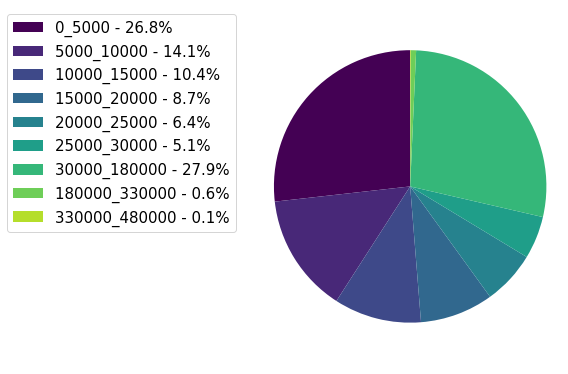

Carbs ნივთიერების სხვაობების შუალედებზე მომხმარებელთა რაოდენობების განაწილება:


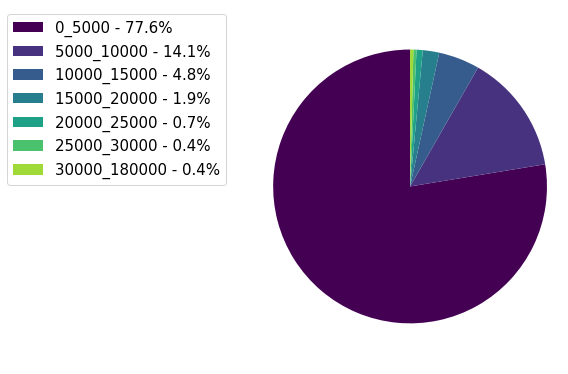

Fat ნივთიერების სხვაობების შუალედებზე მომხმარებელთა რაოდენობების განაწილება:


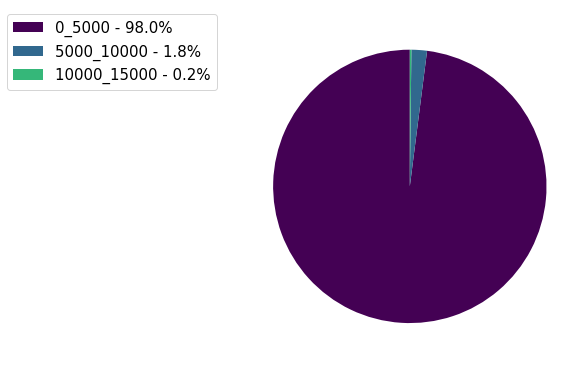

Protein ნივთიერების სხვაობების შუალედებზე მომხმარებელთა რაოდენობების განაწილება:


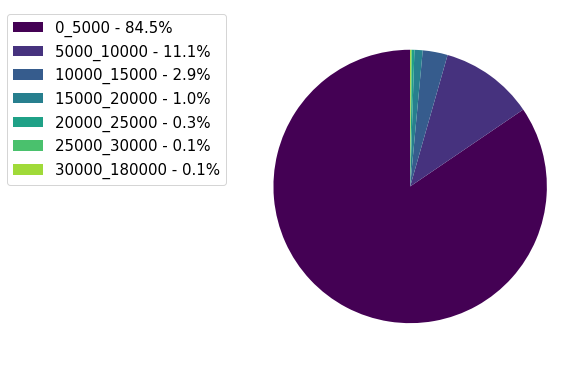

Sodium ნივთიერების სხვაობების შუალედებზე მომხმარებელთა რაოდენობების განაწილება:


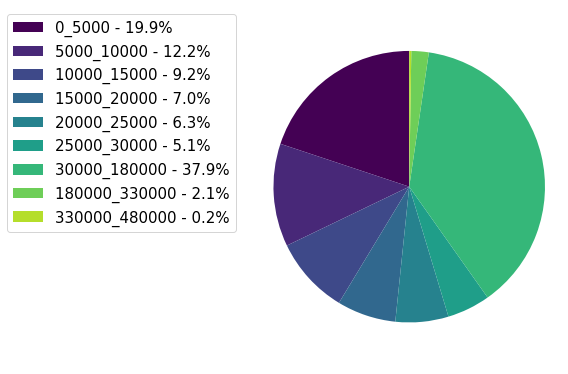

Sugar ნივთიერების სხვაობების შუალედებზე მომხმარებელთა რაოდენობების განაწილება:


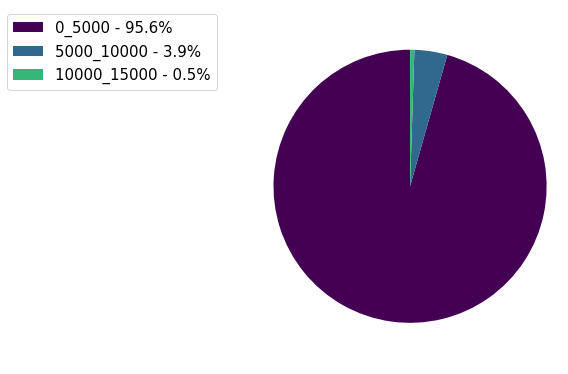

Fiber ნივთიერების სხვაობების შუალედებზე მომხმარებელთა რაოდენობების განაწილება:


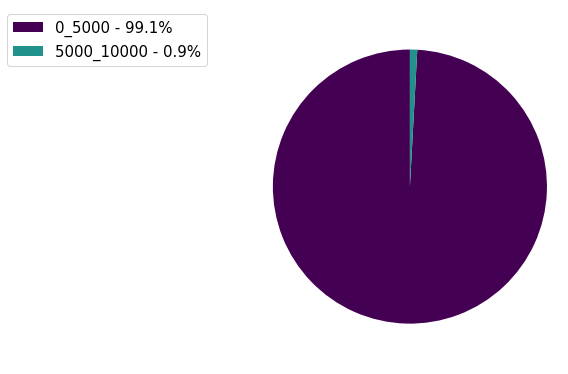

In [15]:
# Set intervals for lower and upper diff diets (depending on average diff)
LOWER_INTERVAL = 5000
UPPER_INTERVAL = 150000
DIFF_AVERAGE = 30000  # ~29388 (average of Sodium diff)
DIFF_MAX = 1816000  # ~1815261 (max of Sodium diff)

users_diffs_intervals = {}
users_diffs_intervals_lower = {}
users_diffs_intervals_upper = {}

curr_int_start = 0
# First count intervals before the average diff
while curr_int_start < DIFF_AVERAGE:
    curr_int_end = curr_int_start + LOWER_INTERVAL
    curr_key = "{0}_{1}".format(curr_int_start, curr_int_end)
    for i in users_diffs:
        curr_diff = users_diffs[i]
        for _name in curr_diff:
            curr_val = 0
            if curr_diff[_name] >= curr_int_start and curr_diff[_name] < curr_int_end:
                curr_val += 1
            if _name not in users_diffs_intervals:
                users_diffs_intervals[_name] = {}
            if curr_key not in users_diffs_intervals[_name]:
                users_diffs_intervals[_name][curr_key] = curr_val
            else:
                users_diffs_intervals[_name][curr_key] += curr_val
    curr_int_start = curr_int_end

# Then count intervals after the average diff until the max diff
while curr_int_start < DIFF_MAX:
    curr_int_end = curr_int_start + UPPER_INTERVAL
    curr_key = "{0}_{1}".format(curr_int_start, curr_int_end)
    for i in users_diffs:
        curr_diff = users_diffs[i]
        for _name in curr_diff:
            curr_val = 0
            if curr_diff[_name] >= curr_int_start and curr_diff[_name] < curr_int_end:
                curr_val += 1
            if _name not in users_diffs_intervals:
                users_diffs_intervals[_name] = {}
            if curr_key not in users_diffs_intervals[_name]:
                users_diffs_intervals[_name][curr_key] = curr_val
            else:
                users_diffs_intervals[_name][curr_key] += curr_val
    curr_int_start = curr_int_end
    
# Remove all intervals where there are less than ~5 users, as it is not important for visualizing data
to_remove = set()
for _name in users_diffs_intervals:
    for k in users_diffs_intervals[_name]:
        if users_diffs_intervals[_name][k] <= 5:
            to_remove.add((_name, k))
for tr in to_remove:
    del users_diffs_intervals[tr[0]][tr[1]]

for _name in users_diffs_intervals:
    print('{0} ნივთიერების სხვაობების შუალედებზე მომხმარებელთა რაოდენობების განაწილება:'.format(_name))
    plot_pie_with_legend(users_diffs_intervals[_name])

# მოდელისთვის მომზადება

<span style="font-size: 16px;">მოდელისთვის მოსამზადებლად თავდაპირველად ვნახოთ, თუ რომელი მომხმარებლების დიეტები არის ჩვენთვის ვალიდური (არ არის დარღვეული დიდი პროცენტობით) და დავტოვოთ მოხლოდ მათი ჩანაწერები. ამისათვის გამოვიყენოთ გაანალიზებული მონაცემები და ცხრილიდან ამოვიღოთ ჩანაწერები, რომელთა დიეტის თითოეული ნივთიერების მიღებულ და განსაზღვრულ რაოდენობათა სხვაობა საშუალოზე (`diff_average`-ზე) მცირეა. მიღებულ მონაცემებს შევინახავთ `good_diet_train` ცვლადში.</span>

In [16]:
# We store user ids of users whose diets are bad in this array
bad_diet_user_ids = set()

for i in users_diffs:
    for _name in users_diffs[i]:
        if users_diffs[i][_name] > diff_averages[_name]:
            bad_diet_user_ids.add(i)
            break

print('{0} მომხმარებელს აქვს საშუალოზე მეტი სხვაობა'.format(len(bad_diet_user_ids)))

4975 მომხმარებელს აქვს საშუალოზე მეტი სხვაობა


In [17]:
good_diet_train = make_dataframe_copy(train, bad_diet_user_ids.union(unaccepted_nutrient_users))

<span style="font-size: 16px;">მიღებული მონაცემები `good_diet_train` ცვლადში შევინახოთ ცალკე *good_diet_train.tsv* ფაილად. (გამოვიყენებთ სატესტო მიზნებისთვის):</span>

In [18]:
good_diet_train.to_csv("good_diet_train.tsv", sep="\t")

<span style="font-size: 16px;">ვინაიდან მომხმარებლის მომდევნო საკვების გასარკვევად მნიშვნელოვანია რომ მაგალითები ყოველდღიური და ჯანსაღი დიეტებიდან ავიღოთ, საჭიროა, რომ დიეტების ხანგრძლივობა არ იყოს ხანმოკლე. ვნახოთ, თუ რომელი მომხმარებლის ჩანაწერები (დიეტები) არის ზუსტად 35 დღის, ან უფრო მეტი ხანგრძლივობის (35 დღეზე ხანრგრძლივი ჩანაწერებიდან გამოვიყენებთ მხოლოდ პირველ 35 დღეს).</span>

In [19]:
# Minimum needed amount of days for the user's diet
NEEDED_DAYS_FOR_DIET = 35

# We will keep track of all the users whose diets' days 
# are less than needed amount in this array
invalid_users = []

days_count = 0
all_users = 0
valid_diets_count = 0
valid_diets_days_count = 0
curr_user_id = good_diet_train.iloc[0, 0]
for i in range(len(good_diet_train.index)):
    # Get the details of the day for the current row
    curr_day_user_id = good_diet_train.iloc[i, 0]

    if curr_day_user_id != curr_user_id:
        # We got to another user
        all_users += 1
        if days_count >= NEEDED_DAYS_FOR_DIET:
            valid_diets_count += 1
            valid_diets_days_count += days_count
        else:
            invalid_users.append(curr_user_id)
        curr_user_id = curr_day_user_id
        days_count = 0 
    days_count += 1

# Last check after the loop
if days_count >= NEEDED_DAYS_FOR_DIET:
    valid_diets_count += 1
    valid_diets_days_count += days_count
else:
    invalid_users.append(curr_user_id)
    
print('{0} მომხმარებლიდან {1} დღეზე ხანგრძლივი დიეტის ჩანაწერი არის {2} მომხმარებელზე'.format(
    all_users, NEEDED_DAYS_FOR_DIET, valid_diets_count))
print('აღნიშნულ მომხმარებლების საერთო დიეტის დღეების რაოდენობა კი ' + str(valid_diets_days_count) + '-ია')

3324 მომხმარებლიდან 35 დღეზე ხანგრძლივი დიეტის ჩანაწერი არის 289 მომხმარებელზე
აღნიშნულ მომხმარებლების საერთო დიეტის დღეების რაოდენობა კი 15399-ია


<span style="font-size: 16px;">ახლა კი წავშალოთ იმ მომხმარებლების მონაცემები, რომელთა დიეტის ხანგრძლივობაც 35 დღეზე ნაკლებია. მიღებული მონაცემები შევინახოთ `valid_days_trained` ცვლადში.</span>

In [20]:
valid_days_trained = make_dataframe_copy(train, bad_diet_user_ids.union(unaccepted_nutrient_users).union(invalid_users))

<span style="font-size: 16px;">მიღებული მონაცემები `valid_days_trained` ცვლადში შევინახოთ ცალკე *valid_days_trained.tsv* ფაილად. (გამოვიყენებთ სატესტო მიზნებისთვის):</span>

In [21]:
valid_days_trained.to_csv("valid_days_trained.tsv", sep="\t")

In [22]:
ACCEPTED_NUTRIENTS = ['Calories', 'Carbs', 'Fat', 'Protein', 'Sodium', 'Sugar', 'Fiber']

user_nutrition_infos = {}
user_nutrition_goals = {}
curr_user_days = []
curr_user_goals = []
curr_user_id = valid_days_trained.iloc[0, 0]
for i in range(len(valid_days_trained.index)):
    # Get the details of the day for the current row
    curr_day_user_id = valid_days_trained.iloc[i, 0]
    curr_sum = json.loads(valid_days_trained.iloc[i, 3])
    curr_day_info = {}
    curr_day_goals = {}
    
    curr_intakes = curr_sum['total']
    for n in range(len(curr_intakes)):
        _name = curr_intakes[n]['name']
        _value = curr_intakes[n]['value']
        if _name not in curr_day_info:
            curr_day_info[_name] = _value
        else:
            curr_day_info[_name] += _value
        
    curr_goals = curr_sum['goal']
    for n in range(len(curr_goals)):
        _name = curr_goals[n]['name']
        _value = curr_goals[n]['value']
        if _name not in curr_day_goals:
            curr_day_goals[_name] = _value
        else:
            curr_day_goals[_name] += _value

    curr_user_days.append(curr_day_info)
    curr_user_goals.append(curr_day_goals)
    
    if curr_day_user_id != curr_user_id:
        # We got to another user
        user_nutrition_infos[curr_user_id] = curr_user_days
        user_nutrition_goals[curr_user_id] = curr_user_goals
        curr_user_days = []
        curr_user_goals = [] 
        curr_user_id = curr_day_user_id

# Last operation after the loop
user_nutrition_infos[curr_user_id] = curr_user_days
user_nutrition_goals[curr_user_id] = curr_user_goals

In [23]:
DAYS_FOR_TRAIN_X = 30
DAYS_FOR_TRAIN_Y = 5

sequence_counts = 0
whole_day_infos = {}
for user_id in user_nutrition_infos:
    whole_day_infos[user_id] = {}
    starting_day = 1
    ending_day = DAYS_FOR_TRAIN_X
    
    curr_days = user_nutrition_infos[user_id]
    curr_goals = user_nutrition_goals[user_id]
    while ending_day <= len(curr_days) - DAYS_FOR_TRAIN_Y:
        curr_day_nutrients = {}
        curr_day_goals = {}
        for curr_day_index in range(starting_day - 1, ending_day):
            curr_day = curr_days[curr_day_index]
            curr_goal = curr_goals[curr_day_index]
            for _name in curr_day:
                if _name not in curr_day_nutrients:
                    curr_day_nutrients[_name] = curr_day[_name]
                    curr_day_goals[_name] = curr_goal[_name]
                else:
                    curr_day_nutrients[_name] += curr_day[_name]
                    curr_day_goals[_name] += curr_goal[_name]
                    
        max_diff = float('-inf')
        max_nutrient = ""
        for _name in curr_day_nutrients:
            diff_pct = ((float(abs(curr_day_nutrients[_name] - curr_day_goals[_name])) * 100) / float(curr_day_goals[_name])) / 100
            if diff_pct > max_diff:
                max_diff = diff_pct
                max_nutrient = _name
                
        for _name in curr_day_nutrients:
            whole_day_infos[user_id][_name] = curr_day_nutrients[_name]
        whole_day_infos[user_id]['max_diff'] = max_diff
        
        sequence_counts += 1
        starting_day += 1
        ending_day += 1

sequence_counts

5573